---

# Python: Projeto Final

Projeto final do curso de Python que compõe a formação "Cientista de Dados" da **EBAC** - Escola Britânica de Artes Criativas e Tecnologia.

---

---

## Objetivo

Este projeto tem como objetivo realizar uma analise de crédito, para identificar possíveis clientes inadimplentes.

Para o projeto, foi fornecido um conjunto de dados de crédito em um arquivo CSV, e serão feitas a exploração, manipulação, limpeza e visualização dos dados. Além de gerar os *insights* das analises realizadas. 

A coluna que indica adimplencia ou inadimplencia é a *default*, valores 0 e 1, respectivamente.

---


## Importações

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

## Exploração dos dados

In [2]:
#Abertura e leitura do CSV
df = pd.read_csv('/kaggle/input/ebac-basedados/Python_M10_support material.csv', na_values='na')

In [3]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [4]:
df.tail(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,NaN,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,NaN,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62
10126,714337233,1,43,F,2,mestrado,casado,menos que $40K,silver,25,6,4,2,"10.388,80","10.294,96",61


In [5]:
tot_linhas, tot_colunas = df.shape
print(f'linhas={tot_linhas} colunas={tot_colunas}')

linhas=10127 colunas=16


In [6]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

### Colunas categóricas

In [7]:
df.describe(include="object")

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao,limite_credito,valor_transacoes_12m
count,10127,8608,9378,9015,10127,10127,10127
unique,2,5,3,5,4,9272,10035
top,F,mestrado,casado,menos que $40K,blue,"1.438,21","3.851,51"
freq,5358,3128,4687,3561,9436,11,3


Quantidade de dados faltantes por colunas

In [8]:
df.select_dtypes("object").isna().sum()

sexo                       0
escolaridade            1519
estado_civil             749
salario_anual           1112
tipo_cartao                0
limite_credito             0
valor_transacoes_12m       0
dtype: int64

### Colunas numéricas

In [9]:
df.drop('id', axis=1).describe(include="number")

,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,qtd_transacoes_12m
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.455317,2.341167,64.858695
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.106225,1.010622,23.472570
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,10.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,45.000000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,67.000000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,81.000000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,139.000000


In [10]:
tot_adimplente = df[df['default']==0].shape[0]

print(f'total adimplentes = {tot_adimplente} /// {round(100*tot_adimplente/tot_linhas,2)}% do total')

total adimplentes = 8500 /// 83.93% do total


In [11]:
tot_inadimplente = df[df['default']==1].shape[0]

print(f'total inadimplentes = {tot_inadimplente} /// {round(100*tot_inadimplente/tot_linhas,2)}% do total')

total inadimplentes = 1627 /// 16.07% do total


Verificar se a proporção de dados faltantes é a mesma para os adimplentes e inadimplentes

In [12]:
def qtde_faltantes_por_coluna(df: pd.DataFrame) -> None:
    
    for coluna in df.columns:
        
        if df[coluna].isna().any():
            
            qtde_tot,_ = df.shape
            qtde_na,_ = df[ df[coluna].isna() ].shape
            
            print(f'coluna {coluna}: qtde faltantes={qtde_na} /// {round(100*qtde_na/qtde_tot,2)}% do total')

In [13]:
#Proporção de dados faltantes para os clientes adimplentes
qtde_faltantes_por_coluna(df[df['default']==0])

print('----------------------------------------------------------')

#Proporção de dados faltantes para os clientes inadimplmentes
qtde_faltantes_por_coluna(df[df['default']==1])

coluna escolaridade: qtde faltantes=1263 /// 14.86% do total
coluna estado_civil: qtde faltantes=620 /// 7.29% do total
coluna salario_anual: qtde faltantes=925 /// 10.88% do total
----------------------------------------------------------
coluna escolaridade: qtde faltantes=256 /// 15.73% do total
coluna estado_civil: qtde faltantes=129 /// 7.93% do total
coluna salario_anual: qtde faltantes=187 /// 11.49% do total


Como as proporções acima são equivalentes, será possível remover as tuplas com dados faltantes no dataset

## Transformação e limpeza dos dados

Remoção das linhas com dados faltantes

In [14]:
#Qtde de NaN por coluna antes da remoção
print(df.isna().sum())

print("=========================================")

#Remove as linhas com valores NaN
df.dropna(inplace=True)

#Qtde de NaN por coluna após remoção
print(df.isna().sum())

id                            0
default                       0
idade                         0
sexo                          0
dependentes                   0
escolaridade               1519
estado_civil                749
salario_anual              1112
tipo_cartao                   0
meses_de_relacionamento       0
qtd_produtos                  0
iteracoes_12m                 0
meses_inativo_12m             0
limite_credito                0
valor_transacoes_12m          0
qtd_transacoes_12m            0
dtype: int64
id                         0
default                    0
idade                      0
sexo                       0
dependentes                0
escolaridade               0
estado_civil               0
salario_anual              0
tipo_cartao                0
meses_de_relacionamento    0
qtd_produtos               0
iteracoes_12m              0
meses_inativo_12m          0
limite_credito             0
valor_transacoes_12m       0
qtd_transacoes_12m         0
dtype: int6

Alterando as colunas "limite_credito" e "valor_transacoes_12m" para float

In [15]:
colunas = ['limite_credito', 'valor_transacoes_12m']
df[colunas].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
4,"4.716,22","816,08"
5,"4.010,69","1.088,07"


In [16]:
#funcao para converter cada linha da coluna
funcao = lambda valor: float( valor.replace(".", "").replace(",", ".") )

#aplica para a coluna "limite_credito"
df['limite_credito'] = df['limite_credito'].apply(funcao)

#aplica para a coluna "valor_transacoes_12m"
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(funcao)

In [17]:
colunas = ['limite_credito', 'valor_transacoes_12m']
df[colunas].dtypes.head(n=5)

limite_credito          float64
valor_transacoes_12m    float64
dtype: object

## Visualização dos dados

In [18]:
#Estilo basico dos gráficos
sns.set_style("whitegrid")

Gero um dataframe pra cada default (adimplentes/inadimplentes)

In [19]:
df_adimplente = df[ df['default'] == 0 ]
df_inadimplente = df[ df['default'] == 1 ]

Comparação da escolaridade X adimplencia

In [20]:
lista_escolaridades = df_adimplente['escolaridade'].unique()
print(lista_escolaridades)

df['escolaridade'].value_counts()

['ensino medio' 'mestrado' 'sem educacao formal' 'graduacao' 'doutorado']


mestrado               2591
ensino medio           1653
sem educacao formal    1204
graduacao               844
doutorado               789
Name: escolaridade, dtype: int64

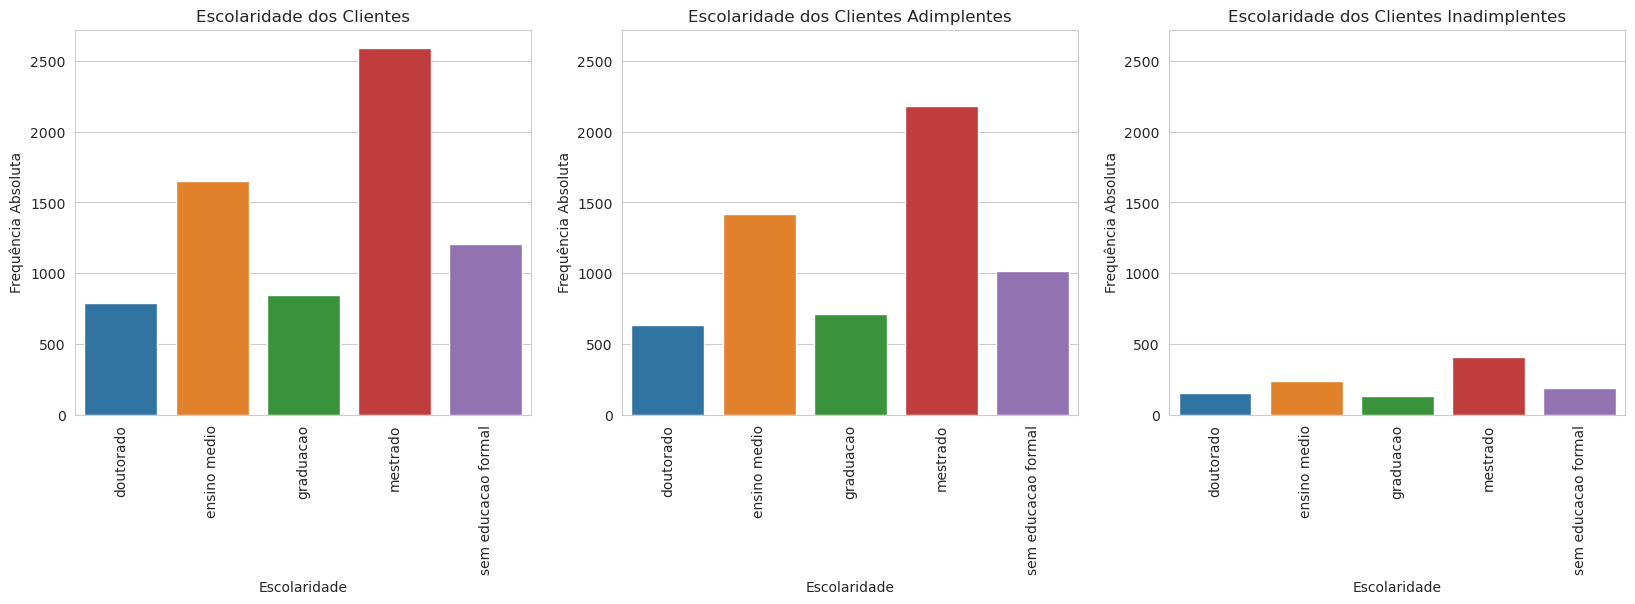

In [21]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df[coluna].describe()['freq'] * 1.1 #pega o maior valor da coluna 'escolaridade'

#3 subplots na mesma linha
figura, eixos = plt.subplots(nrows=1, ncols=3, figsize=(20,5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
    
    #Quantidade de cada valor (categoria) na coluna
    df_to_plot = dataframe[coluna].value_counts().to_frame()
    
    #Renomeia colunas
    df_to_plot.rename( columns = {coluna: 'frequencia_absoluta'}, inplace=True)
    
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])
    
    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    
    #Titulos do grafico e dos eixos
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    
    #Rotacionar os labels do eixo X
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    
    f.set(ylim=(0, max_y))
    
    eixo += 1
    
figura.show()

## Storytelling